# Perceptron + letters

Autor: Adam Polański

## Klasa Perceptron

Wczytuje klase ```Perceptron``` z biblioteki sklearn.

In [1]:
from sklearn.linear_model import Perceptron

## Klasa SLP

####Tworzenie klasy SLP krok po kroku:
1. Na początku stworzyłem konstruktor klasy. Nie ma tu nic szczególnego.


2. Stworzyłem metode ```fit(self, X, y)``` , a w niej listę ```self.perceptrons_ = [0] * len(X)```, która będzie przechowywała tyle obiektów klasy ```Perceptron```, aby na każdą litere przypadał dokładnie jeden z nich.

  Tym razem, nie tworzę listy ```self.errors```, ponieważ klasa ```Perceptron``` z biblioteki *sklearn* nie posiada swojej tablicy *errors_* ani żadnego jej odpowiednika. 

  Następnie dla każdej litery tworze obiekt typu ```Perceptron``` i wywołuje metode ```fit()``` tego obiektu, przekazując w argumentach wszsytkie 10 liter oraz odpowiedni wektor oczekiwanej odpowiedzi.
  

3. Tworzę metode ```predict(self, X)```, która ma za zadanie generować wektory odpowiedzi.

 Tworzę w niej 2-wymiarową tablice zer, każdy wiersz odpowiada za odpowiedzi jednego perceptrona, a każda kolumna za jedną literę przekazaną w postaci elementu listy X.
 
 Dla każdego perceptrona wywołuje jego metode ```predict()``` i jej wynik zapisuje do odpowiedniego wiersza. Na koniec zwracam uzyskany zestaw odpowiedzi.

4. Tworzę metode ```misclassified(self, X, y)``` , która korzystając z faktu, że odpowiedzi są zapisane w postaci liczb '*-1*' lub '*1*' zwraca sumę błędów ostatniego wywołania metody ```predict(X)``` (wynik wywołania metody zapisany jest w zmiennej ```self.predictions```) w stosunku do zestawu odpowiedzi '*y*'.

  Aby uzyskać sumę błędów, najpierw 'odwracam' tablice ```self.predictions``` (dla każdego i w tablicy ```self.predictions``` wykonaj ```i = i * (-1)```). Aby nie modyfikować orginalnej tablicy odpowiedzi, wynik takiego działania zapisuje do zmiennej lokalnej.

  Następnie sumuje każdy element z X i y, a wynik:
   - '0' : oznacza że w danej komórce nie ma błędu
   - '-2' : oznacza, że dany perceptron zareagował pozytywnie, mimo że nie powinien.
   - '2' : oznacza, że dany perceptron nie zareagował pozytywnie, mimo że powinien.

  Z każdego elementu takiej 'zsumowanej' tablicy, biore wartość bezwzględną (nie interesują nas typy błędów, a ich ilość) oraz wykonuje dzielenie całkowite przez 2, a następnie sumuje wszystkie elementy do jednej zmiennej. 

5. Ostatnia funkcja, to funkcja ```show(self, X)``` , która ma za zadanie wyświetlić zbiór liter 'X' w postaci graficznej. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
class SLP(object):
  def __init__(self, eta=0.05, n_iter=10, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    self.perceptrons_ = [0] * len(X)
    for i in range(0, len(X)):
      self.perceptrons_[i] = Perceptron(eta0=self.eta, max_iter=self.n_iter, random_state=self.random_state)
      self.perceptrons_[i].fit(X, y[i])

  def predict(self, X):
    self.predictions = np.zeros((len(self.perceptrons_), len(self.perceptrons_)))
    for i in range(0, len(self.perceptrons_)):
      self.predictions[i, :] = self.perceptrons_[i].predict(X)
    return self.predictions
  
  def misclassified(self, X, y):
    result = 0
    predictions = self.predictions
    predictions = [list(map(lambda x: int(x * (-1)), i)) for i in predictions]
    for i in range(0, len(y)):
      result =  result + (sum(map(lambda x: abs(x) // 2, map(sum, zip(predictions[i], y[i])))))
    return result    
      

  def show(self, X):
    fig, axs = plt.subplots(2, 5, figsize=(14, 8), sharex='col', sharey='row')

    for i, x in enumerate(X):
      ax = axs[i // 5, i % 5]
      ax.imshow(x.reshape(7, 5), cmap='binary')

    plt.show()

## Przygotowywanie danych.

Wczytuje plik z danymi z dysku.

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving letters.data to letters.data


Tworzę obiekt perceptron. Następnie przekazuje dane z pliku do zmiennej df typu DataFrame i ucinam niepotrzebne wiersze (zostawiam tylko moje przypadki). Aby sprawdzić poprawność danych, wyświetlam 10 ostatnich wierszy.

In [8]:
net = SLP()

import io
df = pd.read_csv(io.BytesIO(uploaded['letters.data']), header = None)
#my_cases = '10 11 12 13 14 15 16 17 18 19'   # dane z przykładu
my_cases = '2 4 8 9 12 13 14 17 20 23'
my_cases = list(map(int, my_cases.split()))
print(my_cases)
df = df.iloc[my_cases]
df.head(10)



[2, 4, 8, 9, 12, 13, 14, 17, 20, 23]


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
2,-1,1,1,1,-1,1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,1,1,1,1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,-1,1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,1,1,1,1,1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
12,1,-1,-1,-1,1,1,1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
13,1,-1,-1,-1,1,1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
14,-1,1,1,1,-1,1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
17,1,1,1,1,-1,1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
20,1,-1,-1,-1,1,1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
23,1,-1,-1,-1,1,1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,-1


Następnie rozdzielam każdy wiersz na dane litery przechowywane w 'X' oraz dane odpowiedzi przechowywane w 'y'. Dodatkowo, ucinam wszystkie niepotrzebne kolumny ze zmiennej 'y' (nie ma sensu trzymać np. kolumny o indeksie 3, jeżeli wiersz 3 i tak został ucięty). Na końcu wyświetlam zawartość obu zmiennych.

In [9]:
X = df.iloc[:, :35].values
y = df.iloc[:, 35:].values
y = y[:, my_cases]

print(X)
print('\n\n')
print(y)

[[-1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1
  -1  1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1 -1 -1 -1
  -1  1 -1 -1 -1 -1  1  1  1  1  1]
 [-1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1
  -1 -1 -1  1 -1 -1 -1  1  1  1 -1]
 [ 1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1
   1  1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1  1 -1 -1 -1  1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1
   1  1 -1 -1 -1  1  1 -1 -1 -1  1]
 [-1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1 -1
  -1  1 -1 -1  1 -1  1 -1 -1 -1  1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1 -1 -1

Wyświetlam wylosowane dla mnie litery.

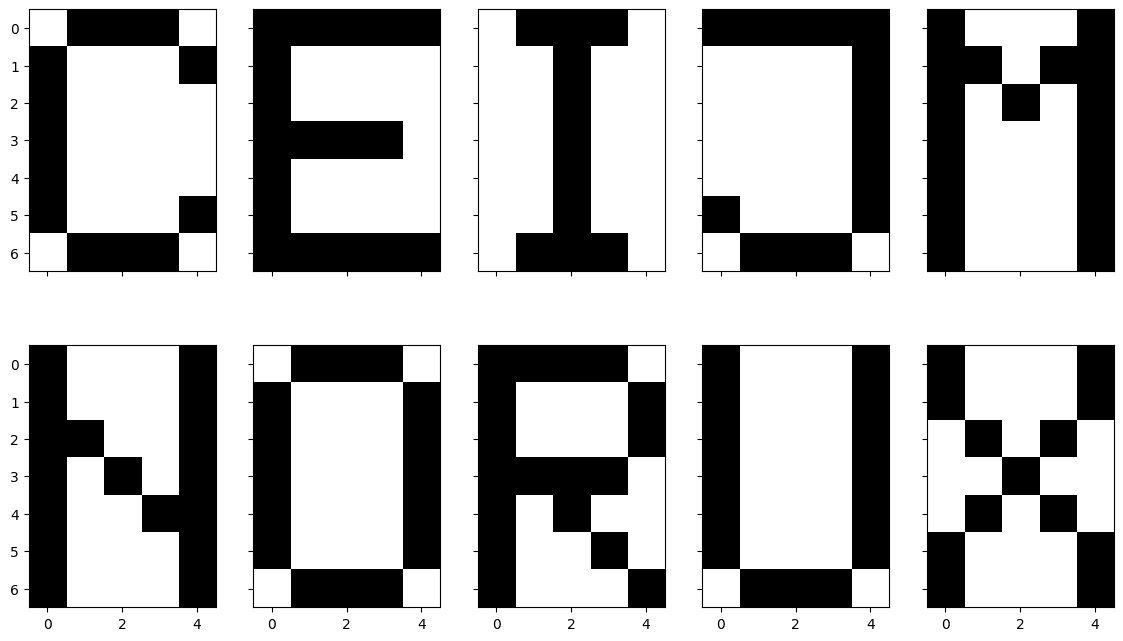

In [10]:
net.show(X)

## Uczenie modelu

Cały proces uczenia odbywa się w komórce poniżej.

In [14]:
net.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Wywołuje metodę ```net.predict(X)``` , aby uzyskać od modelu odpowiedzi.

In [15]:
print(net.predict(X))

[[ 1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]]


Sprawdzam, czy model popełnił jakieś błędy.

In [13]:
print(net.misclassified(X, y))

0


## Testowanie możliwości modelu

Definiuje funckję ```damage(X, percent, seed=1)```.

In [17]:
def damage(X, percent, seed=1):
  rgen = np.random.RandomState(seed)
  result = np.array(X)
  count = int(X.shape[1]*percent/100)

  for indeks_example in range(len(X)):
    order = np.sort(rgen.choice(X.shape[1], count, replace=False))
    for indeks_pixel in order:
      result[indeks_example][indeks_pixel] *= -1
  
  return result

Następnie tworze 3 dodatkowe zbiory, uszkodzone o kolejno:
- 5%
- 15%
- 40%


In [18]:
damaged5 = damage(X, 5)
damaged15 = damage(X, 15)
damaged40 = damage(X, 40) 

Wyświetlam graficznie pierwszy zbiór.

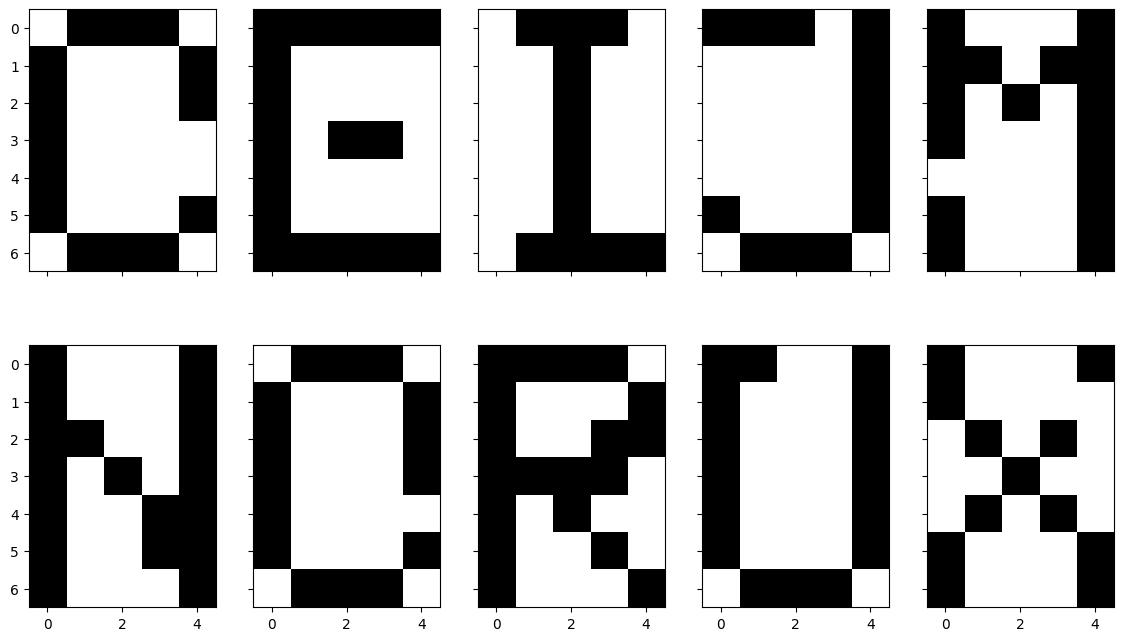

In [19]:
net.show(damaged5)

Wywołuje metodę predict przekazując uszkodzony zbiór.

In [20]:
print(net.predict(damaged5))

[[ 1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1.  1. -1.  1.]]


Wywołuje metode misclassified, aby sprawdzić ile błędów zostało popełnionych podczas ostatniej predykcji.

Jak widać, aż 6 razy litera została źle zinterpretowana.

In [21]:
print(net.misclassified(damaged5, y))

6


W następnych linijkach powtarzam powyższe kroki dla zestawów ```damage15``` oraz ```damage40```.

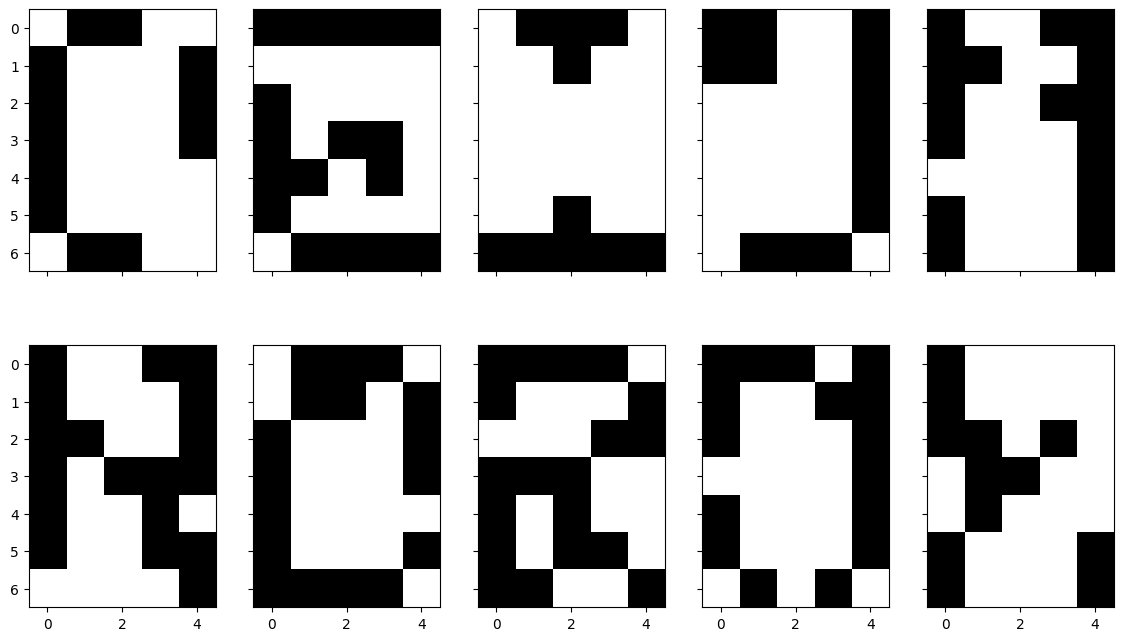

In [22]:
net.show(damaged15)

In [23]:
print(net.predict(damaged15))

[[-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
 [-1.  1.  1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1. -1. -1.  1.]]


Tym razem 8 błędów.

In [25]:
print(net.misclassified(damaged15, y))

8


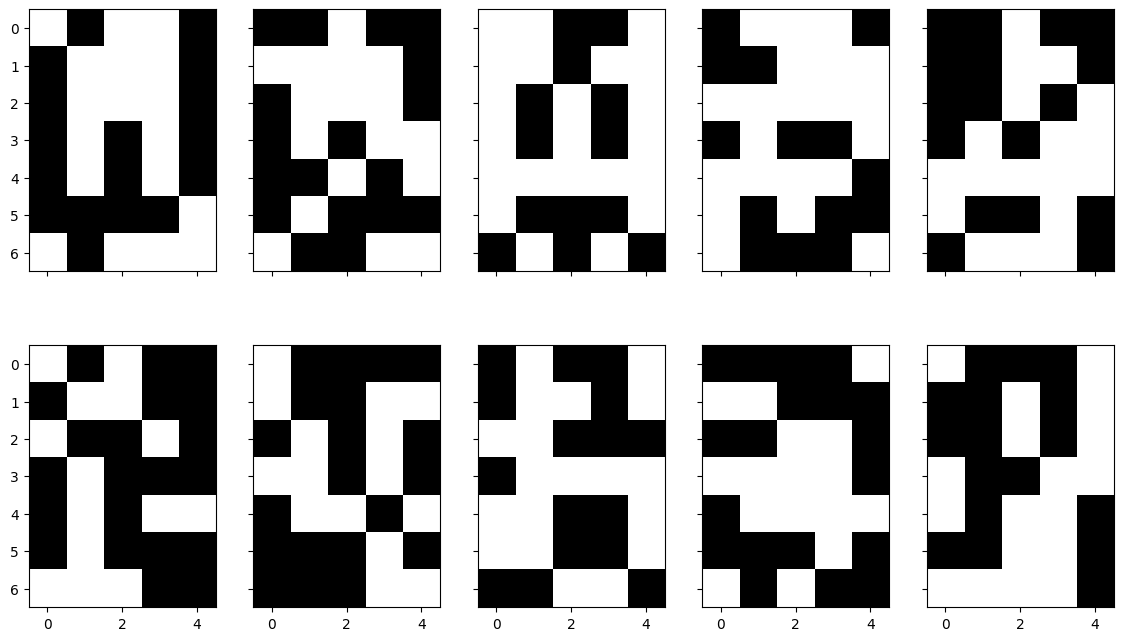

In [26]:
net.show(damaged40)

In [27]:
print(net.predict(damaged40))

[[-1. -1.  1. -1.  1. -1. -1. -1.  1.  1.]
 [-1. -1.  1.  1. -1. -1.  1. -1. -1.  1.]
 [-1. -1.  1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1.  1. -1. -1. -1.  1. -1.  1.  1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1. -1.  1. -1.  1.  1.]
 [-1. -1.  1. -1. -1.  1. -1.  1. -1.  1.]
 [-1. -1. -1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1. -1.  1. -1. -1. -1. -1.  1.]]


Aż 29 błędów (większość perceptronów reaguje pozytywnie na więcej niż jedną literę z zestawu damaged40).

In [28]:
print(net.misclassified(damaged40, y))

29
